Inspecting data from a manual inhibition paradigm

Clara Kuper, January 2021

In this task, one obeserver made radip hand movements from one point to another. In half of the trials, the upper and lower third of the screen turned white for 50ms. This "flash" occured 50 ms before the mean reaction time. This delay is known to elicit saccadic inhibition (a dip in the distribution of saccadic reaction times). We want to see if the same is true fo manual responses.

In this notebook, I will:

1. Load the data from the experiment
2. Look at the reaction time distributions from flash and no-flash conditions
3. Clean the reaction time data
4. Align the reaction times to the onset of the flash and check again for the distribution
5. Compare the flash and no flash condition statistically

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data = pd.read_csv('../1_Data/ck01_MI_dat.csv')
data

id  success  rea_time  clean_rea  mov_time      initPixx       t_start  \
0      1        1  0.216937   0.216937  0.092003  19354.516306  19356.170440   
1      2        1  0.216786   0.216786  0.108419  19358.801814  19360.631008   
2      3        1  0.358458   0.358458  0.383446  19362.859977  19364.589301   
3      4        1  0.241872   0.241872  0.174984  19366.660029  19368.383955   
4      5        1  0.216769   0.216769  0.141766  19370.660078  19372.389232   
..   ...      ...       ...        ...       ...           ...           ...   
512  513        1  0.200125   0.200125  0.191745  21601.459001  21603.180900   
513  514        1  0.366785   0.366785  0.050039  21605.475716  21607.197754   
514  515        1  0.200135   0.200135  0.191745  21609.550756  21611.272861   
515  516        1  0.191482   0.191482  0.283398  21613.575806  21615.297701   
516  517        1  0.200102   0.200102  0.208424  21617.609204  21619.331040   

          t1_draw       t2_draw       t_fixed       t_flash    t_movStart  \
0    19356.176575  19357.801508  19357.110758           NaN  19358.018445   
1    19360.634876  19361.859858  19361.327334  19362.034885  19362.076644   
2    19364.593278  19365.659891  19365.101787  19365.834909  19366.018349   
3    19368.393232  19369.659975  19369.101810           NaN  19369.901846   
4    19372.393333  19373.626676  19372.918518  19373.843656  19373.843444   
..            ...           ...           ...           ...           ...   
512  21603.183895  21604.475580  21603.875831           NaN  21604.675705   
513  21607.200617  21608.550635  21607.917474           NaN  21608.917421   
514  21611.275665  21612.575650  21611.967521           NaN  21612.775785   
515  21615.300778  21616.601035  21615.975892  21616.767441  21616.792518   
516  21619.334128  21620.775766  21620.125934           NaN  21620.975868   

         t_movEnd    t_feedback         t_end   mean_rt       touchX  \
0    19358.110448  19358.801814  19358.801814  0.100000   719.827763   
1    19362.185063  19362.859977  19362.859977  0.166937   909.743695   
2    19366.401795  19366.660029  19366.660029  0.166861  1111.826943   
3    19370.076831  19370.660078  19370.660078  0.214060  1491.129793   
4    19373.985210  19374.635241  19374.635241  0.208513  1560.430593   
..            ...           ...           ...       ...          ...   
512  21604.867450  21605.475716  21605.475716  0.158641   519.860570   
513  21608.967459  21609.550756  21609.550756  0.158547  1314.968218   
514  21612.967530  21613.575806  21613.575806  0.160286  1283.227394   
515  21617.075916  21617.609204  21617.609204  0.160175  1443.518556   
516  21621.184292  21621.775919  21621.775919  0.159974  1339.831864   

         touchY  
0    561.440561  
1    819.719404  
2    768.129776  
3    313.413504  
4    712.241012  
..          ...  
512  406.340975  
513  432.135789  
514  525.393962  
515  738.035826  
516  439.411249  

[517 rows x 18 columns]

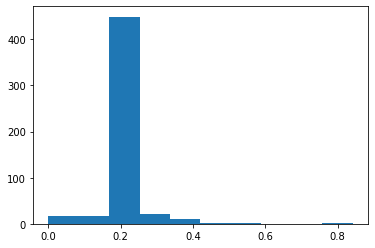

In [21]:
# normalize all times to the "go" signal of the task (t2_draw)
data['initPixx'] = data['initPixx'] - data['t2_draw']
data['t_start'] = data['t_start'] - data['t2_draw']
data['t1_draw'] = data['t1_draw'] - data['t2_draw']
data['t2_draw'] = data['t2_draw'] - data['t2_draw']
data['t_fixed'] = data['t_fixed'] - data['t2_draw']
data['t_flash'] = data['t_flash'] - data['t2_draw']
data['t_movStart'] = data['t_movStart'] - data['t2_draw']
data['t_movEnd'] = data['t_movEnd'] - data['t2_draw']
data['t_feedback'] = data['t_feedback'] - data['t2_draw']
data['t_end'] = data['t_end'] - data['t2_draw']

plt.hist(data.rea_time);

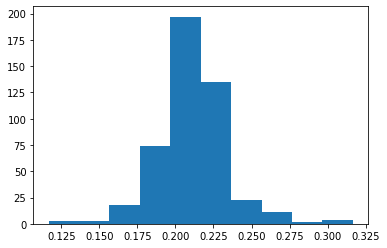

In [29]:
# clean the dataset: remove all time trials where the reaction time is larger or smaller than 2 std
# also, remove all unsuccessful trials
# get standart deviation
rea_std = np.std(data.rea_time)

# get std as variation from mean
rea_cut_high = np.mean(data.rea_time) + 2* rea_std
rea_cut_low = np.mean(data.rea_time) - 2* rea_std

# delete the rows with too low/high reaction times
rm_idx = np.where((data.rea_time >= rea_cut_high) | (data.rea_time <= rea_cut_low))
df = data.drop(rm_idx[0]).reset_index(drop = True)
# delete rows with unsuccessful trials
df = df.drop(np.where(df.success ==0)[0])
# plot all trials together
plt.hist(df.rea_time);

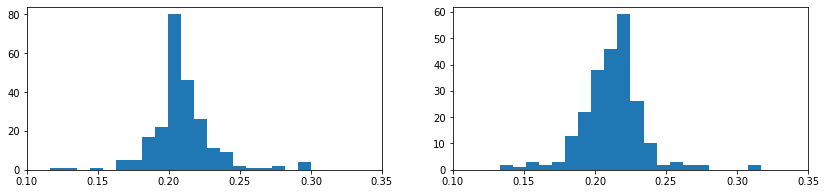

In [42]:
# plot reaction times of flash - and no-flash trials seperately
fig1, axs1 = plt.subplots(1,2, figsize  = (14,3))
axs1[0].hist(df[np.isnan(df.t_flash)]['rea_time'], bins = 20)
axs1[0].set_xlim(0.1,0.35)
axs1[1].hist(df[np.isnan(df.t_flash)==False]['rea_time'], bins = 20)
axs1[1].set_xlim(0.1,0.35);

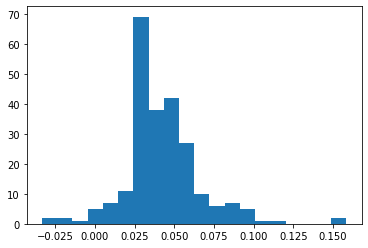

In [49]:
# This doesn't look like a dip, but maybe the problem is that the flash was not always presented 
# at the same time relative to the movement onset. Lets check that

df['flash_movement'] = df.t_movStart - df.t_flash
plt.hist(df.flash_movement, bins =20);

In [59]:
# So we can see that there is a distribution of reaction times, centeres ar 30-50 ms (which is what we were looking for)
# There are few negative times, which is good, bc it means that rarely was the flash shown after the hand already moved.
# We don't see a dip in the responses as we would expect at around 50 - 70 ms
# we can still compare if the reaction times differ between flash and no flash conditions
flash_trials = df[np.isnan(df.t_flash)==False]['rea_time']
no_flash_trials = df[np.isnan(df.t_flash)]['rea_time']

print(len(flash_trials))
print(len(no_flash_trials))

flash_trials = np.random.choice(flash_trials, len(no_flash_trials))

stats.ttest_rel(no_flash_trials,flash_trials)

236
234


Ttest_relResult(statistic=-0.5920835792799961, pvalue=0.5543687146782683)

Conclusion: we find no evidence for manual freezing here, but we will try a few other paradigms.